### 1797명이 0~9의 정수를 쓰게 한 후 이를 식별하는 문제

In [1]:
# 1797명이 0~9의 정수를 쓰게 한 후 이를 식별하는 문제

from sklearn.datasets import load_digits

digits = load_digits()
print(digits.images.shape)

(1797, 8, 8)


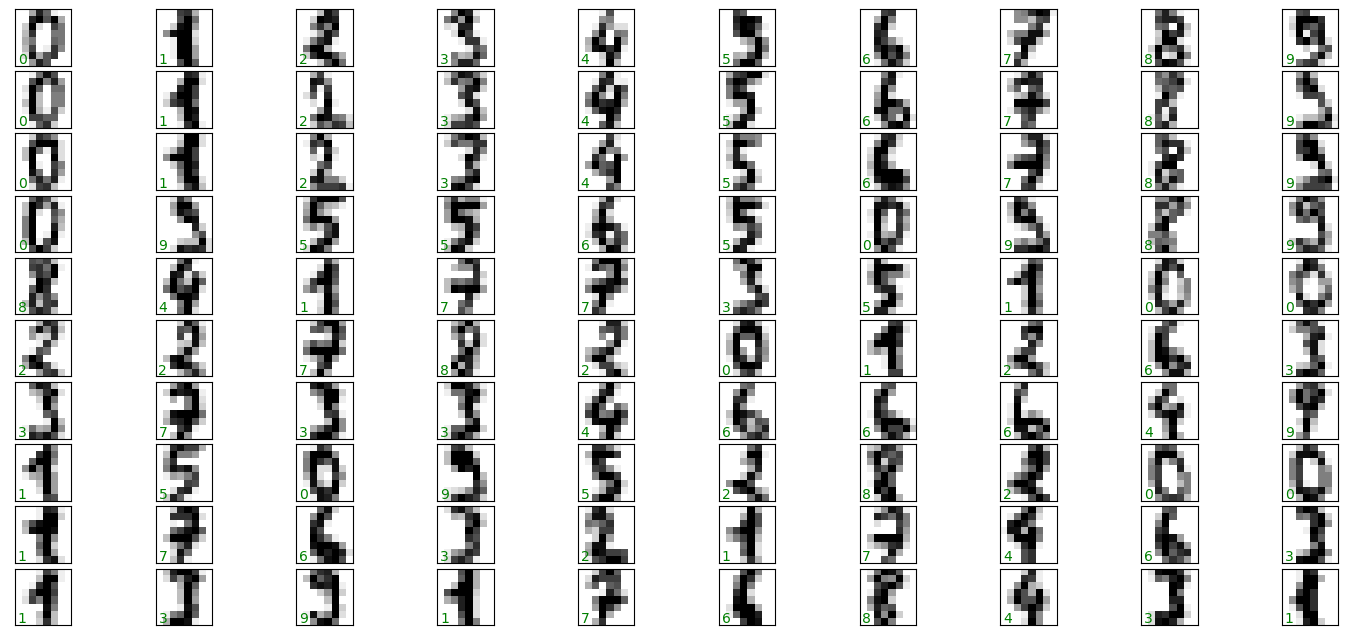

In [4]:
# 손으로 쓴 0~9의 숫자
# 1797명이 쓴 글씨
# 8 x 8 pixel로 이루어져 있음.

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(18, 8), subplot_kw = {'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
plt.show()

In [5]:
# 손글씨 쓴 숫자 : 8 x 8 pixel
# Scikit-learn에서는 오직 2차원으로 정렬된 자료만 분석할 수 있음.
# 3차원을 2차원으로 줄이기 위해 8 x 8 pixel을 64개의 특성변수로 변환해야 함.

# reshape()을 이용하여 변환할 수 있으나, 이미 digits는 이러한 형식으로 다음과 같이 구현되어 있음.

X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [6]:
# 손글씨 데이터 - 정규단순베이즈모형을 적용
# 정규단순베이즈 - GaussianNB 클래스를 호출하여 실행

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.8333333333333334


In [9]:
# 정규분포 Naive Bayes에 의한 분류 결과

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_test_pred)
print(mat)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  4  0]
 [ 0  7 20  2  0  0  0  0 15  0]
 [ 0  0  0 39  0  0  0  1  5  0]
 [ 0  1  0  0 31  0  0  6  0  0]
 [ 0  1  0  1  0 43  0  3  0  0]
 [ 0  0  1  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  6  0  1  0  1  0  2 38  0]
 [ 0  2  0  4  1  0  0  3  7 30]]


### 해석하는 법
- 42개의 '2' 중 7개는 '1'로, 2개는 '3'으로, 15개는 '8'로 잘못 분류하였고, 20개는 제대로 분류함.